In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [2]:
data = pd.read_csv("1553768847-housing.csv")
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  int64  
 3   total_rooms         20433 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  int64  
 6   households          20433 non-null  int64  
 7   median_income       20433 non-null  float64
 8   ocean_proximity     20433 non-null  object 
 9   median_house_value  20433 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.7+ MB


In [3]:
data = data.join(pd.get_dummies(data.ocean_proximity))
data = data.drop(['ocean_proximity'], axis=1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

<Figure size 1920x1080 with 0 Axes>

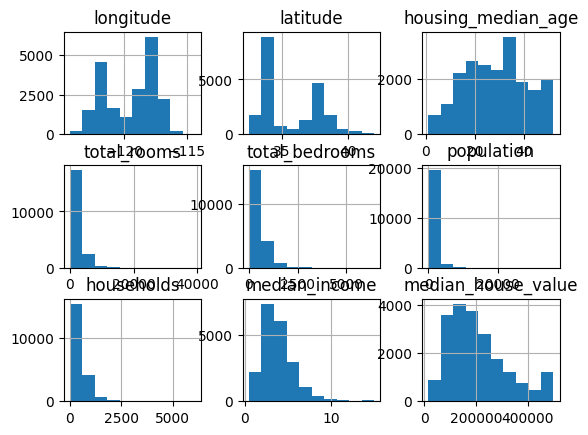

In [4]:
plt.figure(figsize=(19.2, 10.8))
data.hist()

In [5]:
data['total_rooms'] = np.log(data['total_rooms'])
data['total_bedrooms'] = np.log(data['total_bedrooms'])
data['population'] = np.log(data['population'])
data['households'] = np.log(data['households'])
#Some of the values were pretty right skewed on the histogram so I'll apply a log transformation 
#and see if they resembles the other graphs more.

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

<Figure size 1920x1080 with 0 Axes>

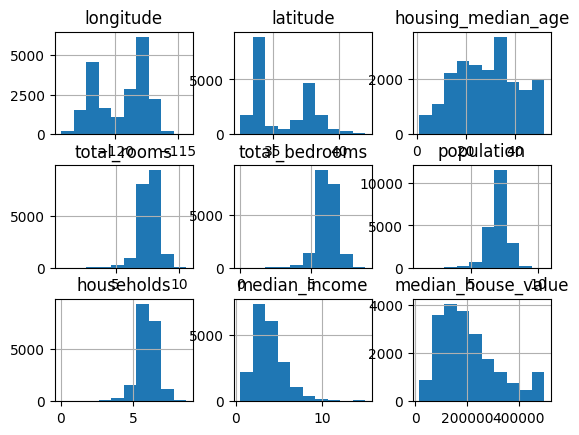

In [6]:
plt.figure(figsize=(19.2, 10.8))
data.hist()

<Axes: >

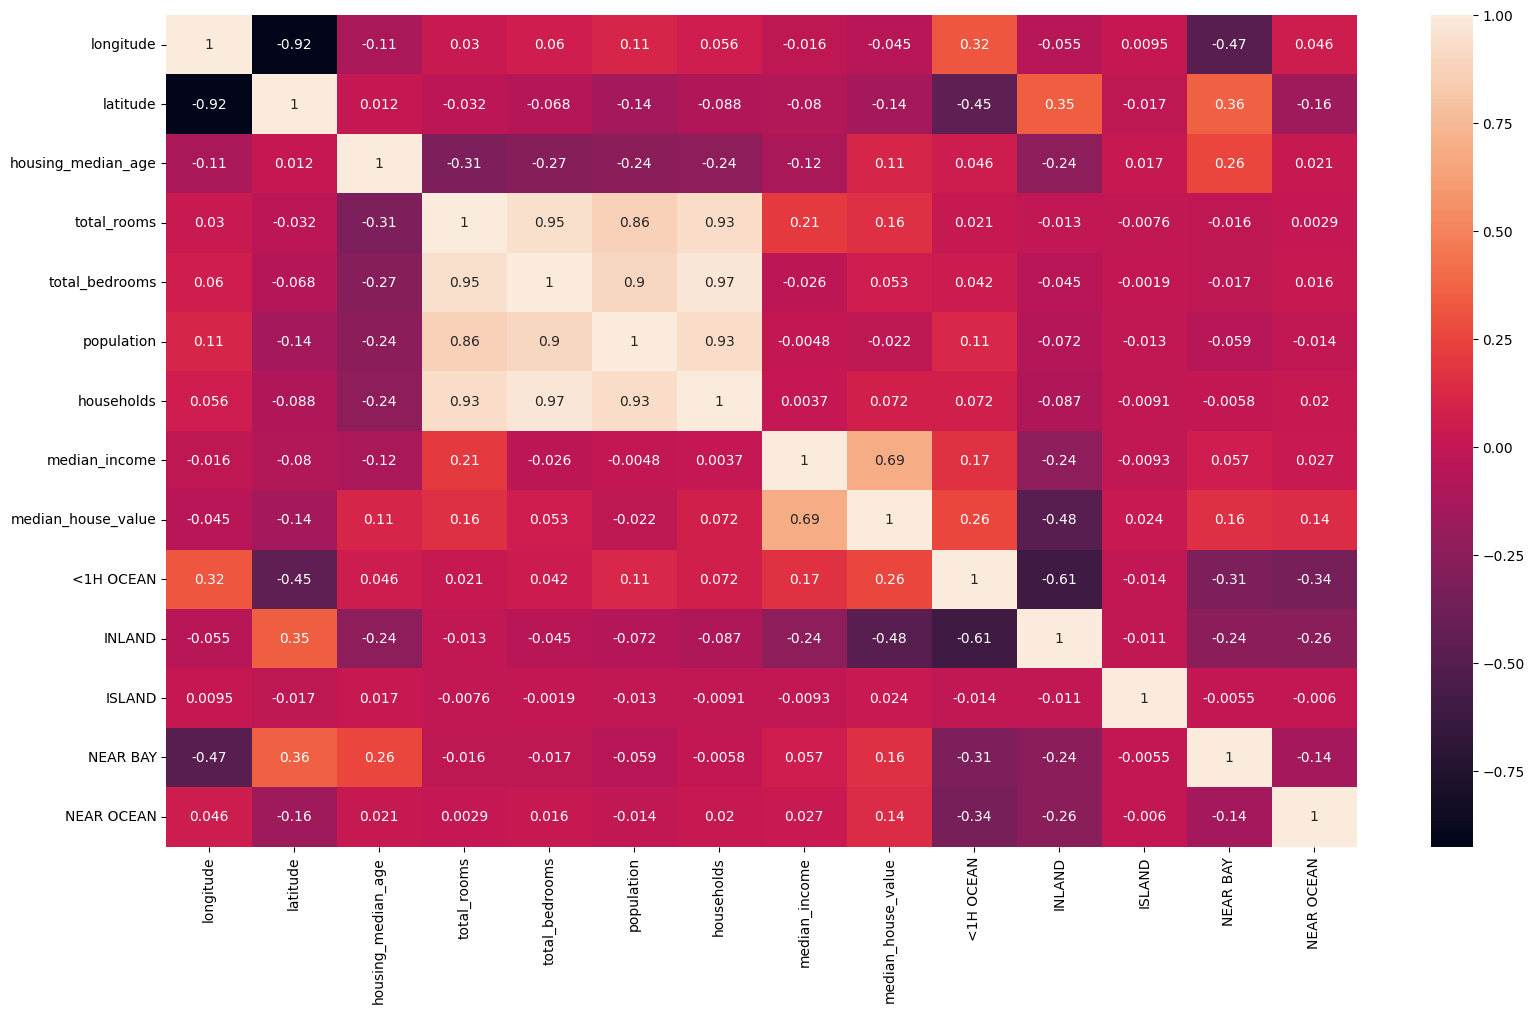

In [7]:
plt.figure(figsize=(19.2, 10.8))
sns.heatmap(data.corr(), annot=True)

In [8]:
data['households_per_person'] = data['households'] / data['population']
data['bedroom_per_person'] = data['total_bedrooms'] / data['population']
data['bedroom_per_room'] = data['total_bedrooms'] / data['total_rooms']
data['rooms_per_person'] = data['total_rooms'] / data['population']
data = data.drop(['longitude'], axis=1)
data = data.drop(['ISLAND'], axis=1)

<Axes: >

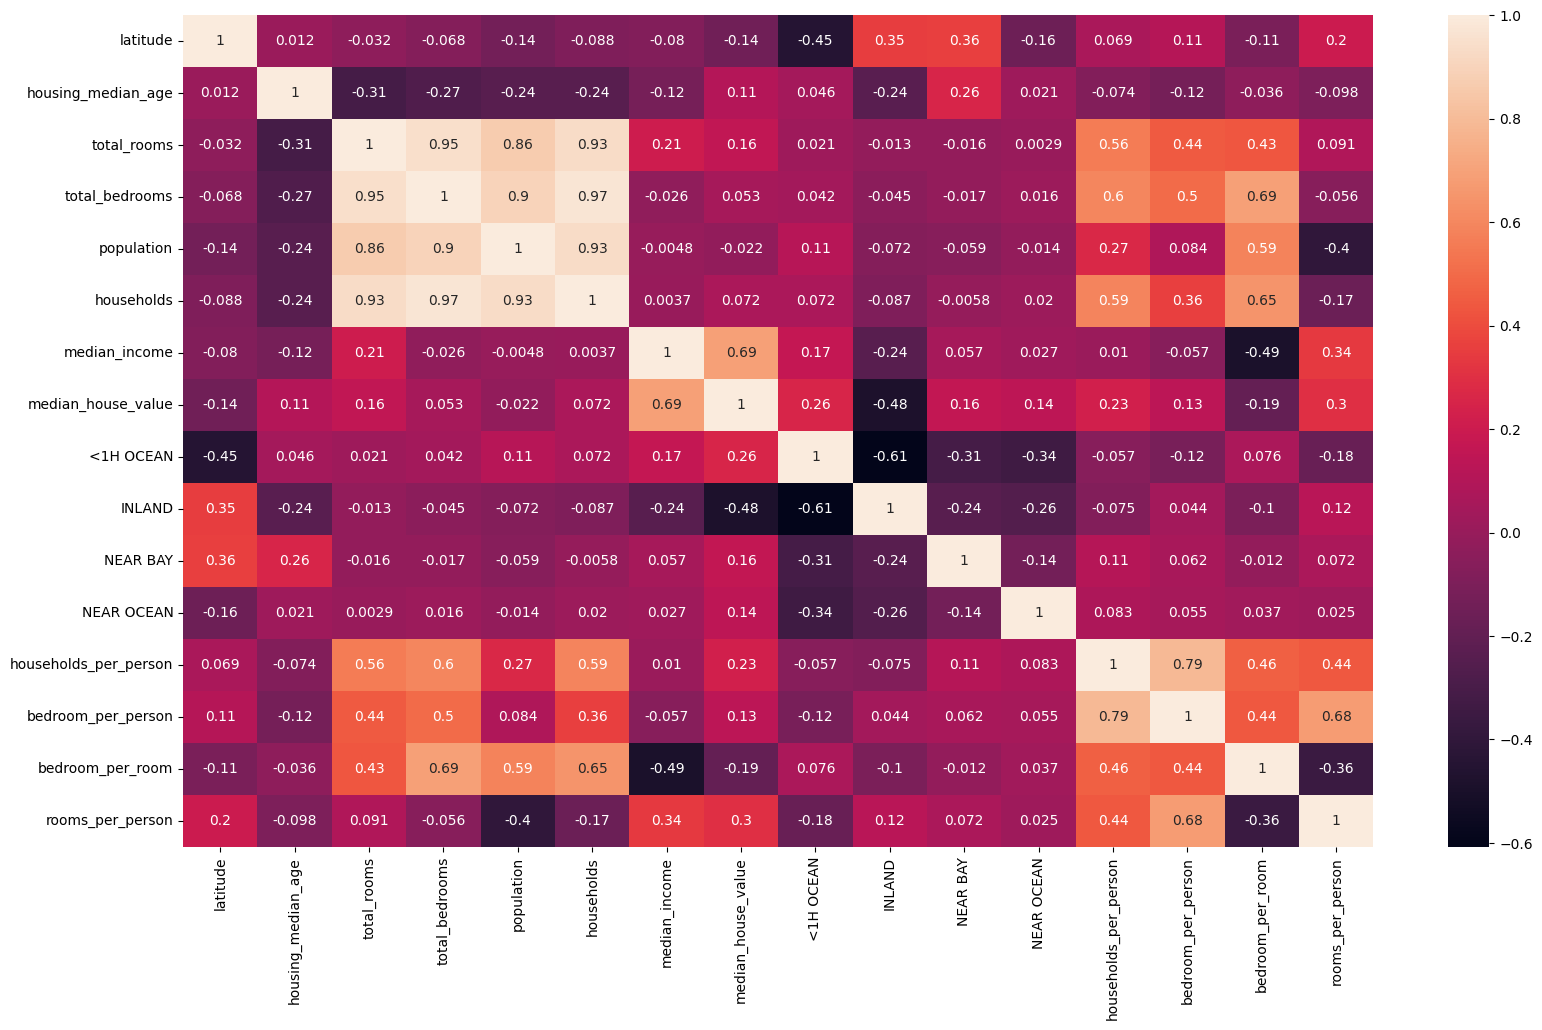

In [9]:
plt.figure(figsize=(19.2, 10.8))
sns.heatmap(data.corr(), annot=True)

In [10]:
x = data.drop(['median_house_value'], axis = 1)
y = data['median_house_value']
training_x, testing_x, training_y, testing_y = train_test_split(x, y, test_size=0.2)
training_data = training_x.join(training_y)
testing_data = testing_x.join(testing_y)

In [11]:
linregressor = LinearRegression()
linregressor.fit(testing_x, testing_y)

LinearRegression()

In [12]:
linregressor.score(testing_x, testing_y)

0.653997439141802

In [13]:
forestregressor = RandomForestRegressor()
forestregressor.fit(training_x, training_y)

RandomForestRegressor()

In [14]:
forestregressor.score(testing_x, testing_y)

0.7797813761951633